In [1]:
import re
import pandas as pd
import json as json
import seaborn as sbn
# import pyspark as py
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# import nltk
# nltk.download('vader_lexicon')
# nltk.download('punkt')

In [2]:
count=0
d=dict()
pd_read=pd.read_json('/ichec/work/mucom001c/Amazon/review/AMAZON_FASHION.json',lines=True)
pd1=pd_read.values.tolist()
for i in pd1:
    t=i[0]
    if t not in d:d[t]=1
    else:
        d[t]+=1
    count+=1
print(d)
print(count)

{5: 465476, 2: 64718, 4: 149331, 3: 97031, 1: 107080}
883636


In [3]:
pd_read.dtypes

overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
style              object
image              object
dtype: object

In [4]:
pd_read.shape

import array as arr

pd_read=pd.read_json('/ichec/work/mucom001c/Amazon/review/AMAZON_FASHION.json',lines=True)
pd_read.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [6]:
review_data=pd_read.drop(['verified','reviewerID','asin','reviewTime','reviewerName','unixReviewTime','vote','style','image'],axis=1)
review_data

,overall,reviewText,summary
0,5,Exactly what I needed.,perfect replacements!!
1,2,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ..."
2,4,Love these... I am going to order another pack...,My New 'Friends' !!
3,2,too tiny an opening,Two Stars
4,3,Okay,Three Stars
...,...,...,...
883631,5,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress
883632,5,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...
883633,3,Too big in the chest area!,Three Stars
883634,3,"Too clear in the back, needs lining",Three Stars


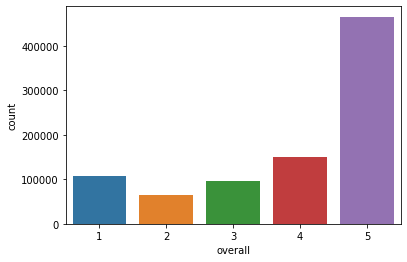

In [7]:
sbn.countplot(review_data['overall'])

In [7]:
print(review_data.isnull().sum())

overall          0
reviewText    1233
summary        533
dtype: int64


In [8]:
# def data_clean( rev, remove_stopwords=True): 
#     new_text = re.sub("[^a-zA-Z]"," ", rev)
#     words = new_text.lower().split()
#     if remove_stopwords:
#         sts = set(stopwords.words("english"))
#         words = [w for w in words if not w in sts]
#     ary=[]
#     eng_stemmer = english_stemmer 
#     for word in words:
#         ary.append(eng_stemmer.stem(word))
#     return(ary)

In [9]:


print ("Original:", review_data.shape)
# review_data_dd = review_data.drop_duplicates()
# dd = review_data_dd.reset_index(drop=True)
# print ("Drop Dupicates:", dd.shape)
review_data = review_data.dropna()
review_data = review_data.reset_index(drop=True)
print ("Drop Nulls:", review_data.shape)
print(review_data.isnull().sum())

Original: (883636, 3)
Drop Nulls: (881900, 3)
overall       0
reviewText    0
summary       0
dtype: int64


In [10]:
#review_data["reviewcomment"] = review_data["reviewText"] + review_data["summary"]
review_data['reviewcomment'] = review_data[['reviewText', 'summary']].astype(str).apply(' '.join, axis=1)

In [11]:
# import nltk
# nltk.download('vader_lexicon')
# nltk.download('punkt')

In [12]:
review_data_list=review_data.drop(['reviewText','summary'],axis=1)
review_data_list

,overall,reviewcomment
0,5,Exactly what I needed. perfect replacements!!
1,2,"I agree with the other review, the opening is ..."
2,4,Love these... I am going to order another pack...
3,2,too tiny an opening Two Stars
4,3,Okay Three Stars
...,...,...
881895,5,I absolutely love this dress!! It's sexy and ...
881896,5,I'm 5'6 175lbs. I'm on the tall side. I wear a...
881897,3,Too big in the chest area! Three Stars
881898,3,"Too clear in the back, needs lining Three Stars"


In [13]:
review_data_list = review_data_list['reviewcomment'].values.tolist()



In [13]:
print((review_data_list[1]))

I agree with the other review, the opening is too small.  I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen.  Would not buy again but for the price, not sending back. I agree with the other review, the opening is ...


In [14]:
#tokenizer

token_list = list()

for i in (review_data_list):
    cleaned = re.sub('\W+', ' ', i).lower()
        # remove all single characters
    cleaned = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned)
 
    # Remove single characters from the start
    cleaned = re.sub(r'\^[a-zA-Z]\s+', ' ', cleaned) 
 
    # Substituting multiple spaces with single space
    cleaned= re.sub(r'\s+', ' ', cleaned, flags=re.I)
 
    # Removing prefixed 'b'
    cleaned = re.sub(r'^b\s+', '', cleaned)
    cleaned = cleaned.strip()
    token_list.append(word_tokenize(str(cleaned)))

    

    

In [15]:
print(token_list[0:10])

[['exactly', 'what', 'needed', 'perfect', 'replacements'], ['i', 'agree', 'with', 'the', 'other', 'review', 'the', 'opening', 'is', 'too', 'small', 'almost', 'bent', 'the', 'hook', 'on', 'some', 'very', 'expensive', 'earrings', 'trying', 'to', 'get', 'these', 'up', 'higher', 'than', 'just', 'the', 'end', 'so', 'they', 're', 'not', 'seen', 'would', 'not', 'buy', 'again', 'but', 'for', 'the', 'price', 'not', 'sending', 'back', 'agree', 'with', 'the', 'other', 'review', 'the', 'opening', 'is'], ['love', 'these', 'am', 'going', 'to', 'order', 'another', 'pack', 'to', 'keep', 'in', 'work', 'someone', 'including', 'myself', 'is', 'always', 'losing', 'the', 'back', 'to', 'an', 'earring', 'don', 'understand', 'why', 'all', 'fish', 'hook', 'earrings', 'don', 'have', 'them', 'just', 'wish', 'that', 'they', 'were', 'tiny', 'bit', 'longer', 'my', 'new', 'friends'], ['too', 'tiny', 'an', 'opening', 'two', 'stars'], ['okay', 'three', 'stars'], ['exactly', 'what', 'wanted', 'five', 'stars'], ['these'

In [15]:
token_list_copy = token_list

In [16]:
len(token_list_copy)

881900

In [17]:
from nltk import SnowballStemmer
from nltk import PorterStemmer
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


In [18]:
def Remove_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

In [ ]:
x1=list()
# count=0
for word in token_list_copy:
#     if count==1000:
#         print(x1)
#         break
#     else:
    x,y=Remove_Stop_Words(word)
    x1.append(y)
#         count+=1
        


In [ ]:
# stop_words,filtered_words = Remove_Stop_Words(word)

In [59]:
x

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# initilaise stemmer

porter_stemmer=PorterStemmer()

In [ ]:
# stem raw words with noise
raw_words = (x1)
print(raw_words[0:10])
stemmed_words = [porter_stemmer.stem(word =' '.join(word)) for word in raw_words]
stemdf = pd.DataFrame({'raw_word': raw_words,'stemmed_word': stemmed_words})

In [23]:
print(stemdf.head())

                                            raw_word  \
0           [exactly, needed, perfect, replacements]   
1  [agree, review, opening, small, almost, bent, ...   
2  [love, going, order, another, pack, keep, work...   
3                        [tiny, opening, two, stars]   
4                               [okay, three, stars]   

                                        stemmed_word  
0                      exactly needed perfect replac  
1  agree review opening small almost bent hook ex...  
2  love going order another pack keep work someon...  
3                              tiny opening two star  
4                                    okay three star  


In [24]:
stemdf['stemmed_word']

0                             exactly needed perfect replac
1         agree review opening small almost bent hook ex...
2         love going order another pack keep work someon...
3                                     tiny opening two star
4                                           okay three star
                                ...                        
881895    absolutely love dress sexy comfortable split b...
881896    5 6 175lbs tall side wear large ordered large ...
881897                            big chest area three star
881898                   clear back needs lining three star
881899    ordered slightly small worked company gracious...
Name: stemmed_word, Length: 881900, dtype: object

In [29]:
from nltk.stem import WordNetLemmatizer


In [73]:
# import nltk
# nltk.download()

In [27]:

import nltk
from nltk.corpus import wordnet
from collections import Counter



In [28]:
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  
  pos_counts = Counter()


  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

# ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

In [30]:
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for word in Words:
        Lemmatized_Words.append(Lm.lemmatize(word,get_part_of_speech(word)))
    return Lemmatized_Words

In [31]:
x2=list()
for word in x1:
#     print(word)
    x_temp = Lemmatizing_Words(word)
    x2.append(x_temp)
#     break

In [32]:
print(x1[0:10])


[['exactly', 'needed', 'perfect', 'replacements'], ['agree', 'review', 'opening', 'small', 'almost', 'bent', 'hook', 'expensive', 'earrings', 'trying', 'get', 'higher', 'end', 'seen', 'would', 'buy', 'price', 'sending', 'back', 'agree', 'review', 'opening'], ['love', 'going', 'order', 'another', 'pack', 'keep', 'work', 'someone', 'including', 'always', 'losing', 'back', 'earring', 'understand', 'fish', 'hook', 'earrings', 'wish', 'tiny', 'bit', 'longer', 'new', 'friends'], ['tiny', 'opening', 'two', 'stars'], ['okay', 'three', 'stars'], ['exactly', 'wanted', 'five', 'stars'], ['little', 'plastic', 'backs', 'work', 'great', 'loosing', 'hook', 'earrings', 'wish', 'ordered', 'sooner', 'lost', 'favorite', 'earrings', 'works', 'great'], ['mother', 'law', 'wanted', 'present', 'sister', 'liked', 'said', 'would', 'work', 'bought', 'present'], ['item', 'good', 'quality', 'looks', 'great', 'fit', '100', 'stretched', 'fit', 'carefully', 'push', 'bottom', 'case', 'fingers', 'shove', 'pack', '100',

In [33]:
print(x2[0:4])


[['exactly', 'need', 'perfect', 'replacement'], ['agree', 'review', 'opening', 'small', 'almost', 'bend', 'hook', 'expensive', 'earring', 'try', 'get', 'high', 'end', 'see', 'would', 'buy', 'price', 'send', 'back', 'agree', 'review', 'opening'], ['love', 'go', 'order', 'another', 'pack', 'keep', 'work', 'someone', 'include', 'always', 'lose', 'back', 'earring', 'understand', 'fish', 'hook', 'earring', 'wish', 'tiny', 'bit', 'long', 'new', 'friend'], ['tiny', 'opening', 'two', 'star']]


In [80]:
print (len(x2))

881900


In [36]:
x2_str = [' '.join(i) for i in x2] 
len(x2_str)

881900

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [37]:
tf = TfidfVectorizer(smooth_idf = False,sublinear_tf = False,norm = None,analyzer = 'word')
cv = CountVectorizer()
txt_fitted = tf.fit(x2_str)
txt_transformed = txt_fitted.transform(x2_str)

In [51]:

# print("The Text:",x2_str)

for i, row in enumerate(txt_transformed):
    print(txt_transformed[i])
    break
    
    
    

  (0, 56704)	6.807896460604202
  (0, 50821)	3.4893341712487405
  (0, 46514)	4.235598383576734
  (0, 26540)	4.747991443463681


In [40]:
type(txt_transformed)

scipy.sparse.csr.csr_matrix

In [41]:
txt_transformed.shape

(881900, 76656)

In [42]:
print (txt_transformed[0,:])

  (0, 56704)	6.807896460604202
  (0, 50821)	3.4893341712487405
  (0, 46514)	4.235598383576734
  (0, 26540)	4.747991443463681


In [38]:

from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(x2_str)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names(), text_vectorizer.idf_))

In [84]:
n=0
for keys,values in tfidf_vector.items():
    print (keys, values)
    n+=1
    if(n==10):break
        
    

00 7.451338242896674
10 5.280889784947801
100 6.295940108719296
11 6.493949692476243
12 5.7603997999876135
13 7.189858542838917
14 6.380896831195261
15 6.921301782865005
16 6.557716310835232
18 6.61425244711932


In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
# sample_review = review_data.reviewcomment[:10]
sample_review = x2_str[:5]
for test in sample_review:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
exactly need perfect replacement
compound: 0.6124, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
agree review opening small almost bend hook expensive earring try get high end see would buy price send back agree review opening
compound: 0.8126, 
neg: 0.085, 
neu: 0.597, 
pos: 0.318, 
love go order another pack keep work someone include always lose back earring understand fish hook earring wish tiny bit long new friend
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
tiny opening two star
compound: 0.2263, 
neg: 0.0, 
neu: 0.513, 
pos: 0.487, 
okay three star


In [43]:
txt_transformed_df = pd.DataFrame.sparse.from_spmatrix(txt_transformed)

In [44]:
txt_transformed_df.head()


,0,1,2,3,4,5,6,7,8,9,...,76646,76647,76648,76649,76650,76651,76652,76653,76654,76655
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
sum(txt_transformed_df.iloc[4])
type(txt_transformed_df)

pandas.core.frame.DataFrame

In [52]:
txt_transformed_df['overall'] = pd_read['overall']

In [55]:
# txt_transformed_df['asin'] = pd_read['asin']

In [60]:
txt_transformed_df['reviewcomment'] = review_data['reviewcomment']

In [61]:
txt_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,76649,76650,76651,76652,76653,76654,76655,overall,asin,reviewcomment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7106116521,Exactly what I needed. perfect replacements!!
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7106116521,"I agree with the other review, the opening is ..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7106116521,Love these... I am going to order another pack...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7106116521,too tiny an opening Two Stars
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,7106116521,Okay Three Stars


In [62]:
from sklearn.model_selection import train_test_split  

In [63]:
X_train, X_test, y_train, y_test = train_test_split(txt_transformed, y, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [881900, 17]

In [58]:
from sklearn.cluster import MiniBatchKMeans

clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(test_vecor)
kmodel_clusters = kmodel.predict(test_vecor)
kmodel_distances = kmodel.transform(test_vecor)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 five
 star
 great
 nice
 good

Cluster 1:
 ring
 love
 beautiful
 look
 great

Cluster 2:
 nice
 wear
 well
 fit
 get

Cluster 3:
 beautiful
 five
 star
 dress
 love

Cluster 4:
 perfect
 five
 fit
 star
 love

Cluster 5:
 like
 look
 picture
 fit
 really

Cluster 6:
 small
 size
 run
 two
 order

Cluster 7:
 love
 five
 star
 daughter
 fit

Cluster 8:
 large
 size
 order
 fit
 small

Cluster 9:
 good
 quality
 price
 fit
 five

Cluster 10:
 cute
 shirt
 super
 fit
 love

Cluster 11:
 wife
 love
 five
 star
 great

Cluster 12:
 excellent
 five
 star
 quality
 product

Cluster 13:
 online
 look
 buy
 dress
 order

Cluster 14:
 great
 fit
 look
 price
 love

Cluster 15:
 three
 star
 small
 ok
 fit

Cluster 16:
 one
 star
 small
 cheap
 break

Cluster 17:
 four
 star
 nice
 good
 fit

Cluster 18:
 love
 buy
 fit
 color
 get

Cluster 19:
 happy
 purchase
 star
 five
 fit

